In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("gorgan_census95_activity.csv")

In [6]:
filt = (df["age_group"] != "10-14") & (df["age_group"] != "65+")
df["total"] = df["p_active_emp"] + df["p_active_unemp"] + df["p_inactive_edu"] + df["p_inactive_homemaker"] + df["p_inactive_incomeNojob"] + df["p_inactive_other"] + df["p_not_stated"]
df["perc"] = df["p_active_emp"] / df["total"] * 100

In [7]:
df.head()

,settlement,gender,age_group,p_active_emp,p_active_unemp,p_inactive_edu,p_inactive_homemaker,p_inactive_incomeNojob,p_inactive_other,p_not_stated,total,perc
0,city,male,10-14,57,7,12361,16,1,261,2,12705,0.448642
1,city,male,15-19,1148,292,9747,33,8,905,6,12139,9.457122
2,city,male,20-24,3526,1996,5693,49,27,2032,11,13334,26.443678
3,city,male,25-29,11176,3554,2025,59,54,1037,10,17915,62.383478
4,city,male,30-34,15532,2543,898,70,97,1470,13,20623,75.313970


In [8]:
print(df.loc[filt, "p_active_emp"].sum() / df.loc[filt, "total"].sum())

0.3951888351947102


In [15]:
filtshahr = (df["age_group"] != "10-14") & (df["age_group"] != "65+") & (df["settlement"] == "city")
filtroosta = (df["age_group"] != "10-14") & (df["age_group"] != "65+") & (df["settlement"] == "village")
print(df.loc[filtshahr, "p_active_emp"].sum() / df.loc[filtshahr, "total"].sum() - df.loc[filtroosta, "p_active_emp"].sum() / df.loc[filtroosta, "total"].sum())

-0.020648194811251852


In [17]:
filtmale = (df["gender"] == "male") & (df["age_group"] != "10-14") & (df["age_group"] != "65+")
filtfemale = (df["gender"] == "female") & (df["age_group"] != "10-14") & (df["age_group"] != "65+")
print(df.loc[filtmale, "p_active_emp"].sum() / df.loc[filtmale, "total"].sum() * 100 - df.loc[filtfemale, "p_active_emp"].sum() / df.loc[filtfemale, "total"].sum() * 100)

51.48154744100474


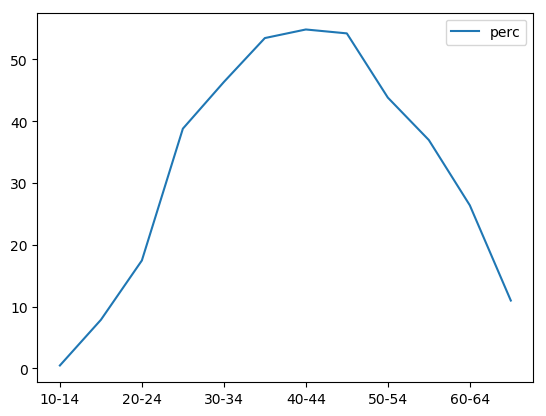

In [11]:
df1 = pd.DataFrame()
A = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"]
agegrp = df.groupby("age_group")
for x in A:
    df1.loc[x, "total"] = agegrp.get_group(x)["total"].sum()
    df1.loc[x, "p_active_emp"] = agegrp.get_group(x)["p_active_emp"].sum()
df1["perc"] = df1["p_active_emp"] / df1["total"] * 100
df1["perc"].plot()
plt.legend()

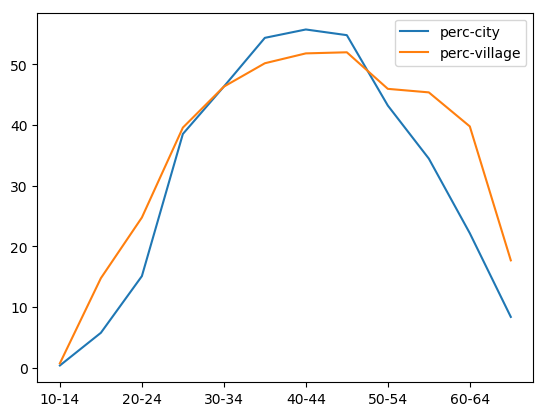

In [12]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
A = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"]
agegrp = df.groupby("age_group")
for x in A:
    df1.loc[x, "total"] = agegrp.get_group(x).loc[df["settlement"] == "city","total"].sum()
    df1.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[df["settlement"] == "city","p_active_emp"].sum()
df1["perc-city"] = df1["p_active_emp"] / df1["total"] * 100
df1["perc-city"].plot()
for x in A:
    df2.loc[x, "total"] = agegrp.get_group(x).loc[df["settlement"] == "village","total"].sum()
    df2.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[df["settlement"] == "village","p_active_emp"].sum()
df2["perc-village"] = df2["p_active_emp"] / df2["total"] * 100
df2["perc-village"].plot()
plt.legend()

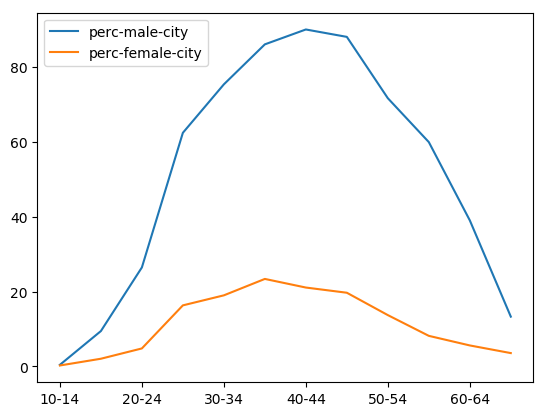

In [13]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
A = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"]
agegrp = df.groupby("age_group")
for x in A:
    df1.loc[x, "total"] = agegrp.get_group(x).loc[(df["settlement"] == "city") & (df["gender"] == "male"),"total"].sum()
    df1.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[(df["settlement"] == "city") & (df["gender"] == "male"),"p_active_emp"].sum()
df1["perc-male-city"] = df1["p_active_emp"] / df1["total"] * 100
df1["perc-male-city"].plot()
for x in A:
    df2.loc[x, "total"] = agegrp.get_group(x).loc[(df["settlement"] == "city") & (df["gender"] == "female"),"total"].sum()
    df2.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[(df["settlement"] == "city") & (df["gender"] == "female"),"p_active_emp"].sum()
df2["perc-female-city"] = df2["p_active_emp"] / df2["total"] * 100
df2["perc-female-city"].plot()
plt.legend()

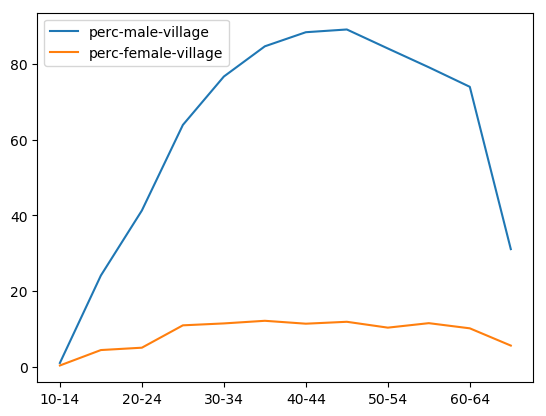

In [14]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
A = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"]
agegrp = df.groupby("age_group")
for x in A:
    df1.loc[x, "total"] = agegrp.get_group(x).loc[(df["settlement"] == "village") & (df["gender"] == "male"),"total"].sum()
    df1.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[(df["settlement"] == "village") & (df["gender"] == "male"),"p_active_emp"].sum()
df1["perc-male-village"] = df1["p_active_emp"] / df1["total"] * 100
df1["perc-male-village"].plot()
for x in A:
    df2.loc[x, "total"] = agegrp.get_group(x).loc[(df["settlement"] == "village") & (df["gender"] == "female"),"total"].sum()
    df2.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[(df["settlement"] == "village") & (df["gender"] == "female"),"p_active_emp"].sum()
df2["perc-female-village"] = df2["p_active_emp"] / df2["total"] * 100
df2["perc-female-village"].plot()
plt.legend()

گزارش فاز 1 :
1-39.51888351947102%
2- 2.0648194811251852%
3-51.48154744100474%
4- در رنج 40-44 در اوج خود و در 50 شروع به کاهش چشمگیر می کند
5-شاغلان شهر
6- طبق نمودار ها تقریبا شبیه هم است 